In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import seaborn as sns
from skimage import io, color, exposure, filters

In [4]:
image_dir = '/mnt/c/Users/alpas/OneDrive/ITU-DERSLER/Deep Learning/Project/UAV_Detection/datasets/sim_dataset/train/images'  # Update this to your image dataset directory
image_paths = glob(os.path.join(image_dir, '*.png'))

In [ ]:
image_paths

In [6]:
def display_samples(image_paths, num_samples=5):
    sample_paths = np.random.choice(image_paths, num_samples)
    plt.figure(figsize=(15, 10))
    for i, path in enumerate(sample_paths):
        img = Image.open(path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

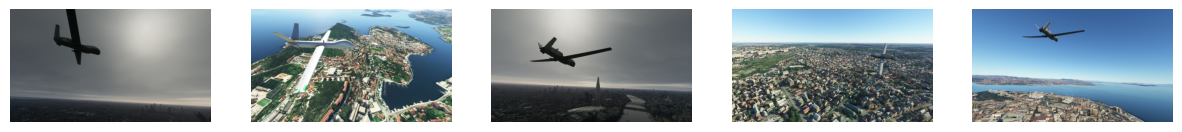

In [7]:
display_samples(image_paths)

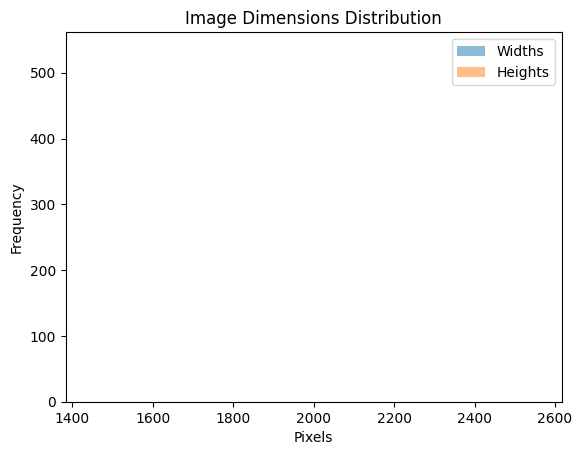

In [8]:
# Image dimensions analysis
dimensions = [Image.open(path).size for path in image_paths]
widths, heights = zip(*dimensions)
plt.hist(widths, bins=30, alpha=0.5, label='Widths')
plt.hist(heights, bins=30, alpha=0.5, label='Heights')
plt.legend(loc='upper right')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Image Dimensions Distribution')
plt.show()

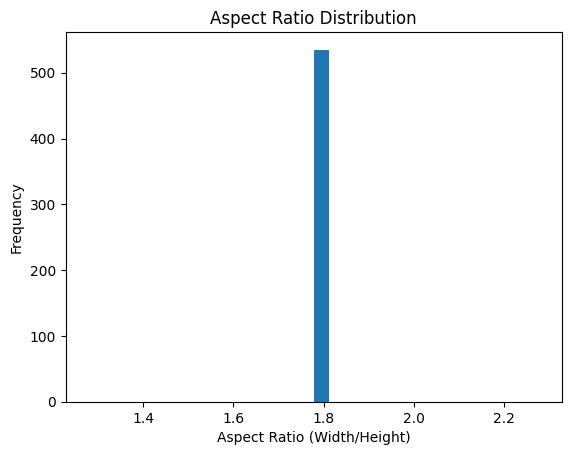

In [9]:
# Aspect ratio analysis
aspect_ratios = [w / h for w, h in dimensions]
plt.hist(aspect_ratios, bins=30)
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.title('Aspect Ratio Distribution')
plt.show()

In [10]:
# Function to plot color histograms
def plot_color_histogram(image):
    image = np.array(image)
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 4))
    for i, color in enumerate(colors):
        hist, bins = np.histogram(image[:, :, i], bins=256, range=(0, 256))
        plt.plot(hist, color=color)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.title('Color Histogram')
    plt.show()

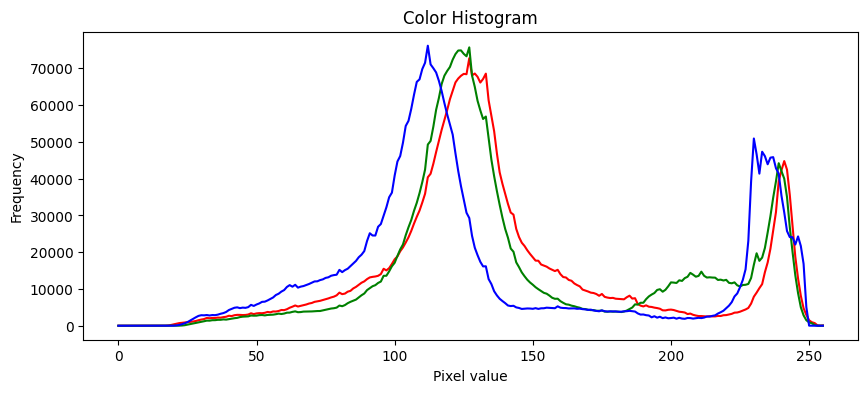

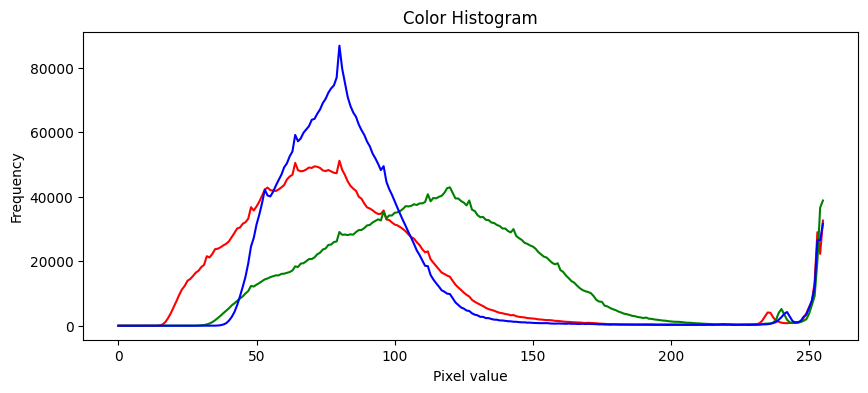

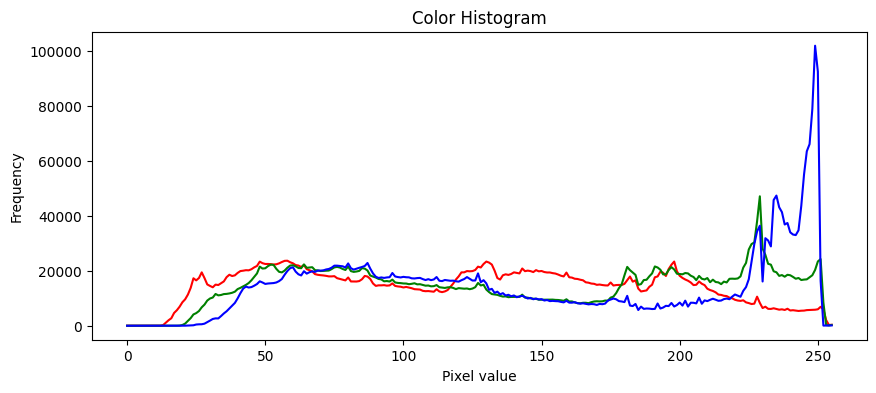

In [11]:
# Display color histograms for random samples
sample_paths = np.random.choice(image_paths, 3)
for path in sample_paths:
    img = Image.open(path)
    plot_color_histogram(img)

In [12]:
# Brightness analysis
def compute_brightness(image):
    image = np.array(image.convert('L'))
    return np.mean(image)

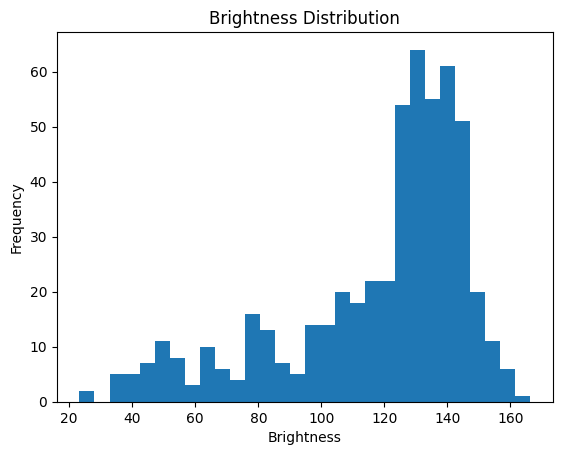

In [13]:
brightness_values = [compute_brightness(Image.open(path)) for path in image_paths]
plt.hist(brightness_values, bins=30)
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.title('Brightness Distribution')
plt.show()